# **Data Preprocessing**

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [148]:
data = pd.read_csv('Country-data.csv')

In [149]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [150]:
data.shape

(167, 10)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [152]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [153]:
data.isnull().sum() * 100 / len(data)

,0
country,0.0
child_mort,0.0
exports,0.0
health,0.0
imports,0.0
income,0.0
inflation,0.0
life_expec,0.0
total_fer,0.0
gdpp,0.0


In [154]:
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## **Handling Unique and Duplicate Records: Dropping Uniques & Removing Duplicates**

In [155]:
data.drop(columns=['country'], inplace=True)

In [156]:
data.duplicated().sum()

np.int64(0)

## **Handling Outliers**

In [158]:
#Data before capping
data_before_capping = data.copy()

In [159]:
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values in-place
    data[col] = np.where(data[col] < lower, lower,
                  np.where(data[col] > upper, upper, data[col]))

In [276]:
print("📊 Outlier Counts: Before vs After Capping\n")

for col in data.select_dtypes(include='number').columns:
    # Before
    Q1_b = data_before_capping[col].quantile(0.25)
    Q3_b = data_before_capping[col].quantile(0.75)
    IQR_b = Q3_b - Q1_b
    lower_b = Q1_b - 1.5 * IQR_b
    upper_b = Q3_b + 1.5 * IQR_b
    out_before = ((data_before_capping[col] < lower_b) | (data_before_capping[col] > upper_b)).sum()

    # After
    Q1_a = data[col].quantile(0.25)
    Q3_a = data[col].quantile(0.75)
    IQR_a = Q3_a - Q1_a
    lower_a = Q1_a - 1.5 * IQR_a
    upper_a = Q3_a + 1.5 * IQR_a
    out_after = ((data[col] < lower_a) | (data[col] > upper_a)).sum()

    print(f"📌 {col}: {out_before} → {out_after} outliers")

📊 Outlier Counts: Before vs After Capping

📌 child_mort: 4 → 0 outliers
📌 exports: 5 → 0 outliers
📌 health: 2 → 0 outliers
📌 imports: 4 → 0 outliers
📌 income: 8 → 0 outliers
📌 inflation: 5 → 0 outliers
📌 life_expec: 3 → 0 outliers
📌 total_fer: 1 → 0 outliers
📌 gdpp: 25 → 0 outliers


# **Data visualization**

In [162]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

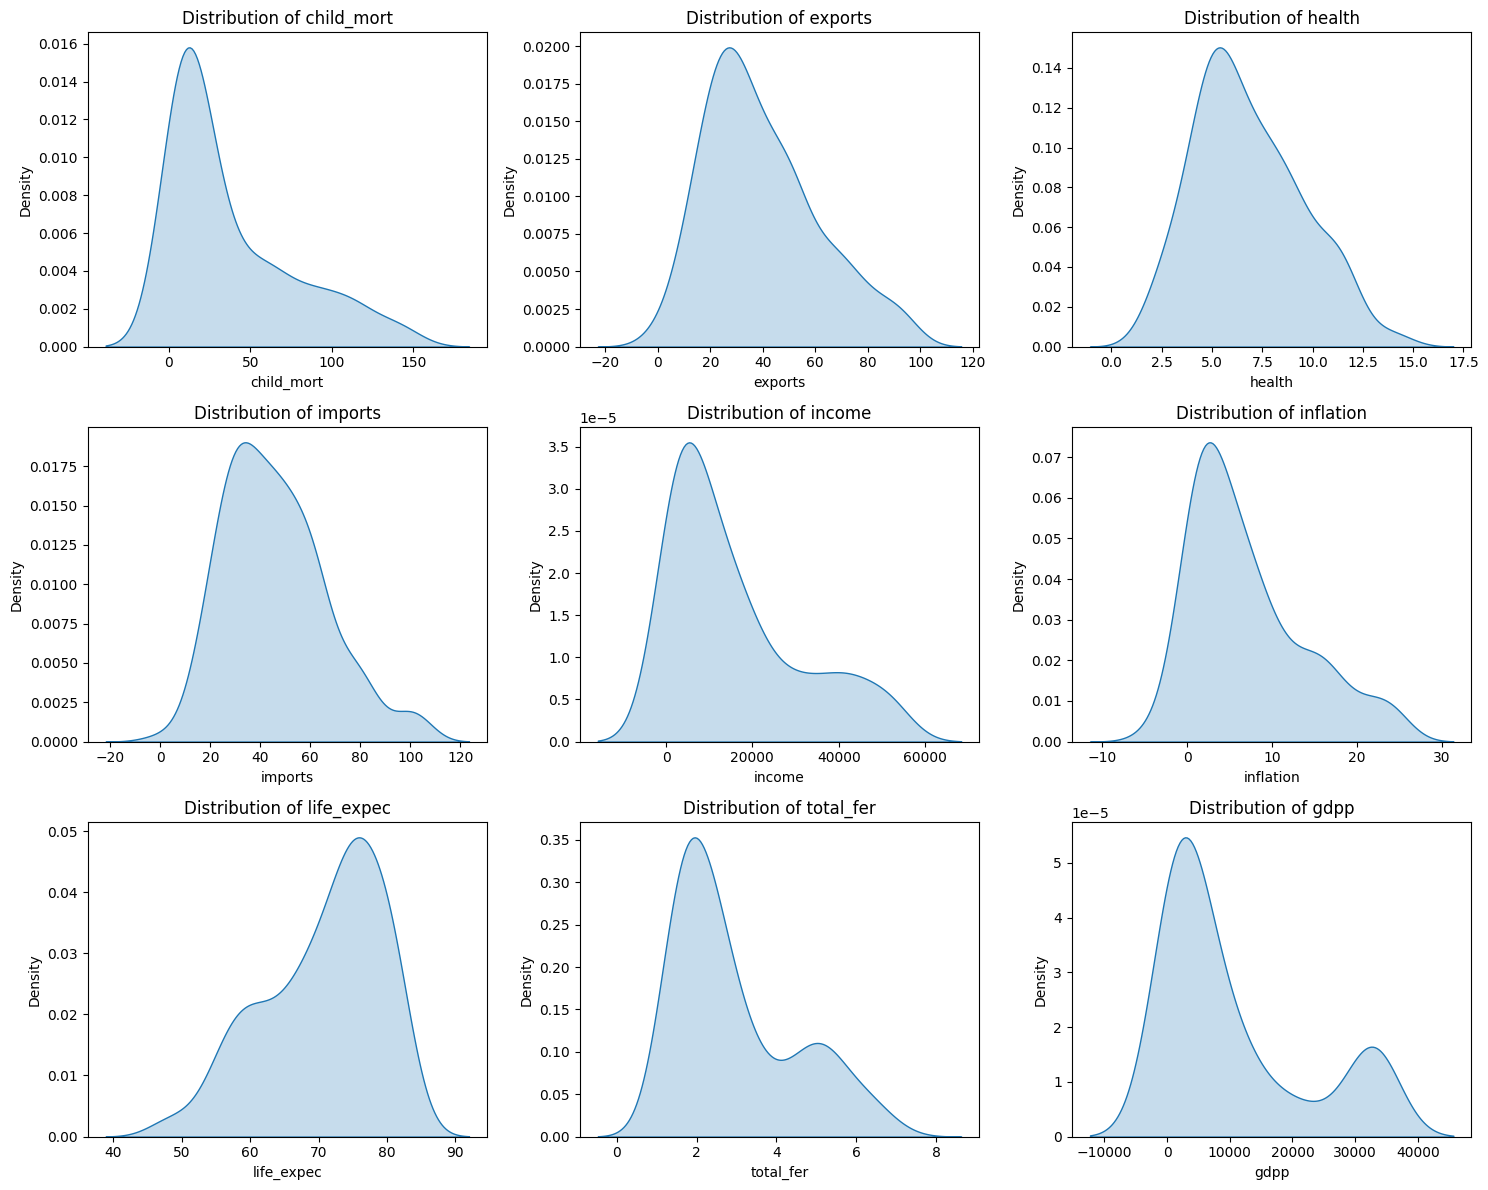

In [163]:
import math

n_features = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data[col], fill=True)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

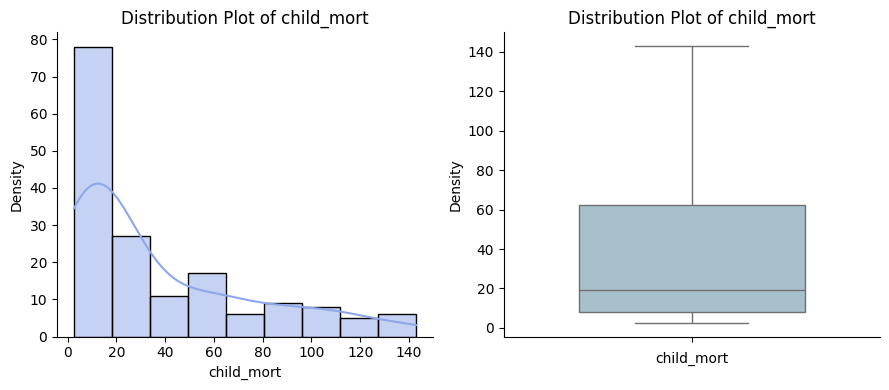

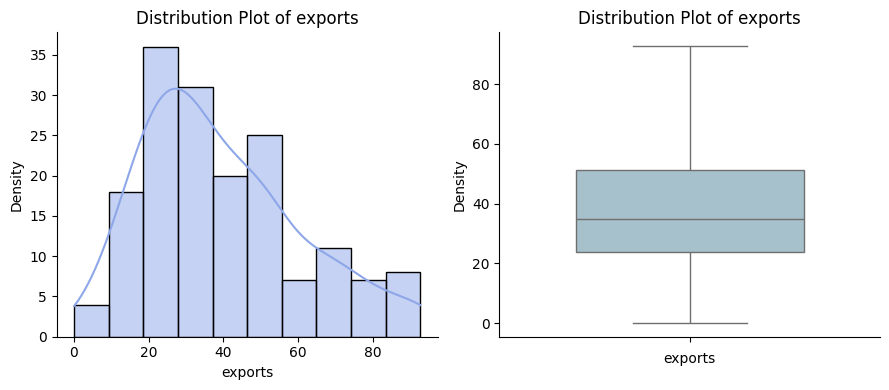

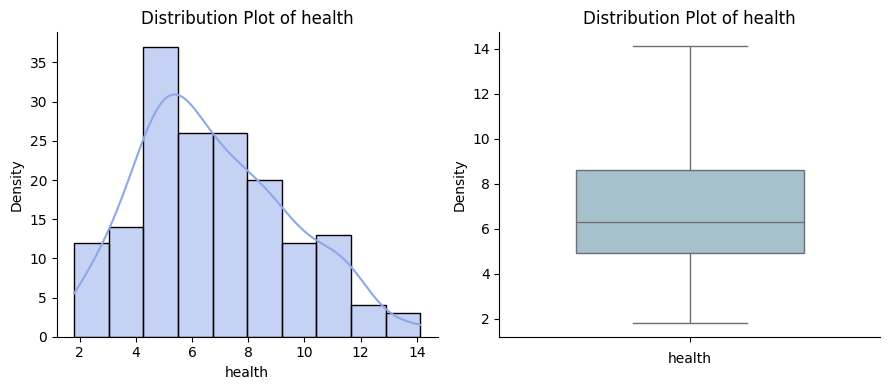

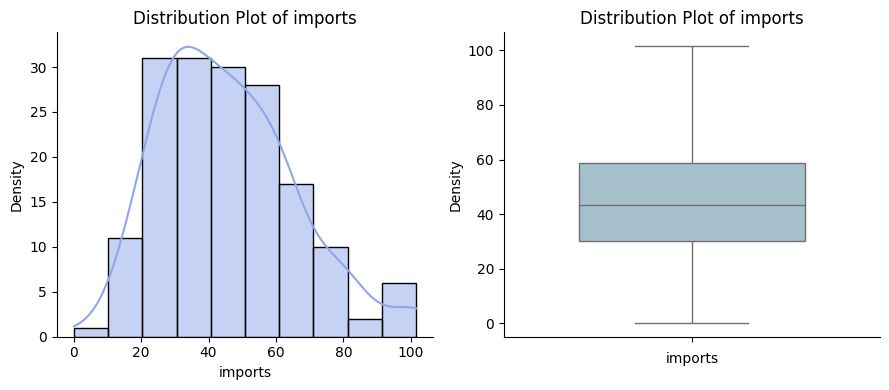

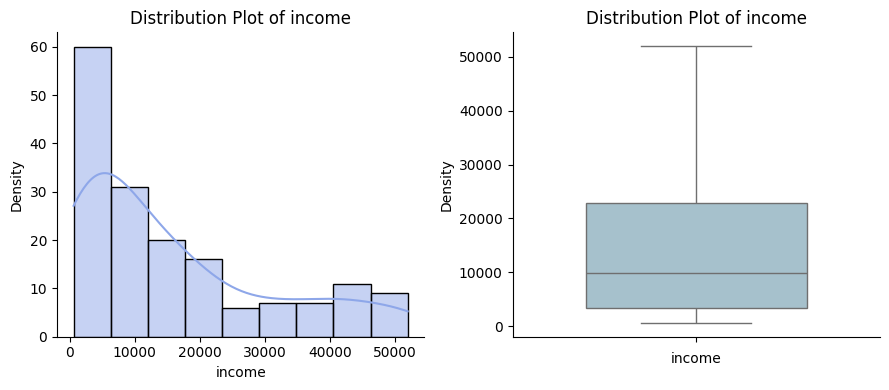

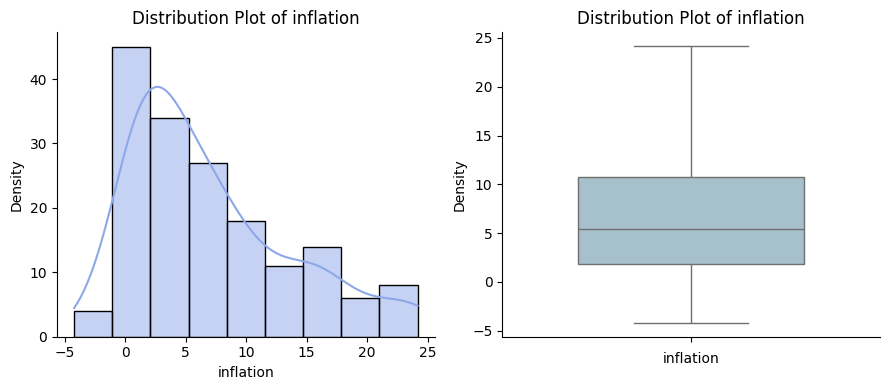

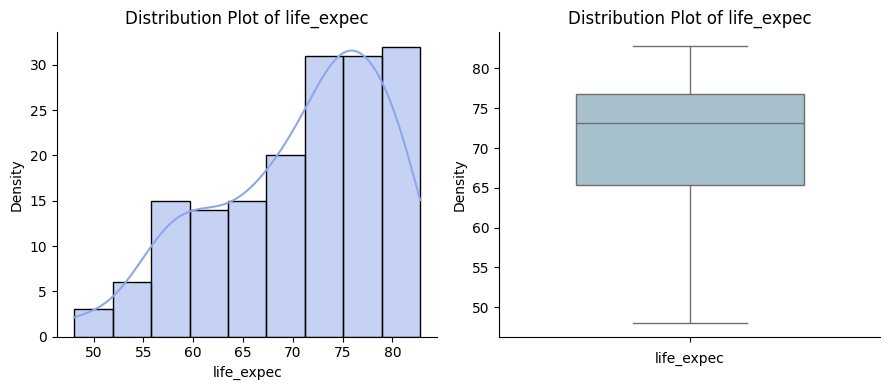

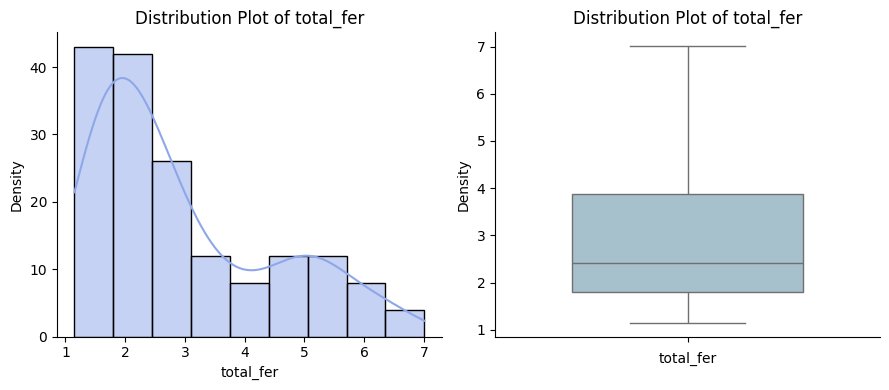

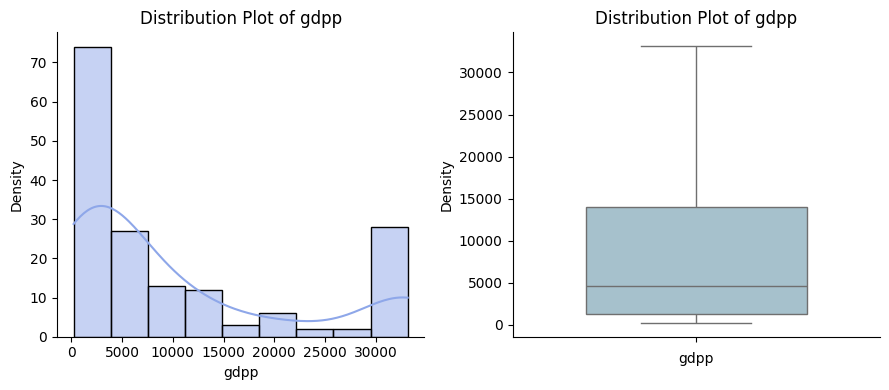

In [164]:
numerical_col = data.columns
for i in range(len(numerical_col)):
    plt.figure(figsize=(9,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

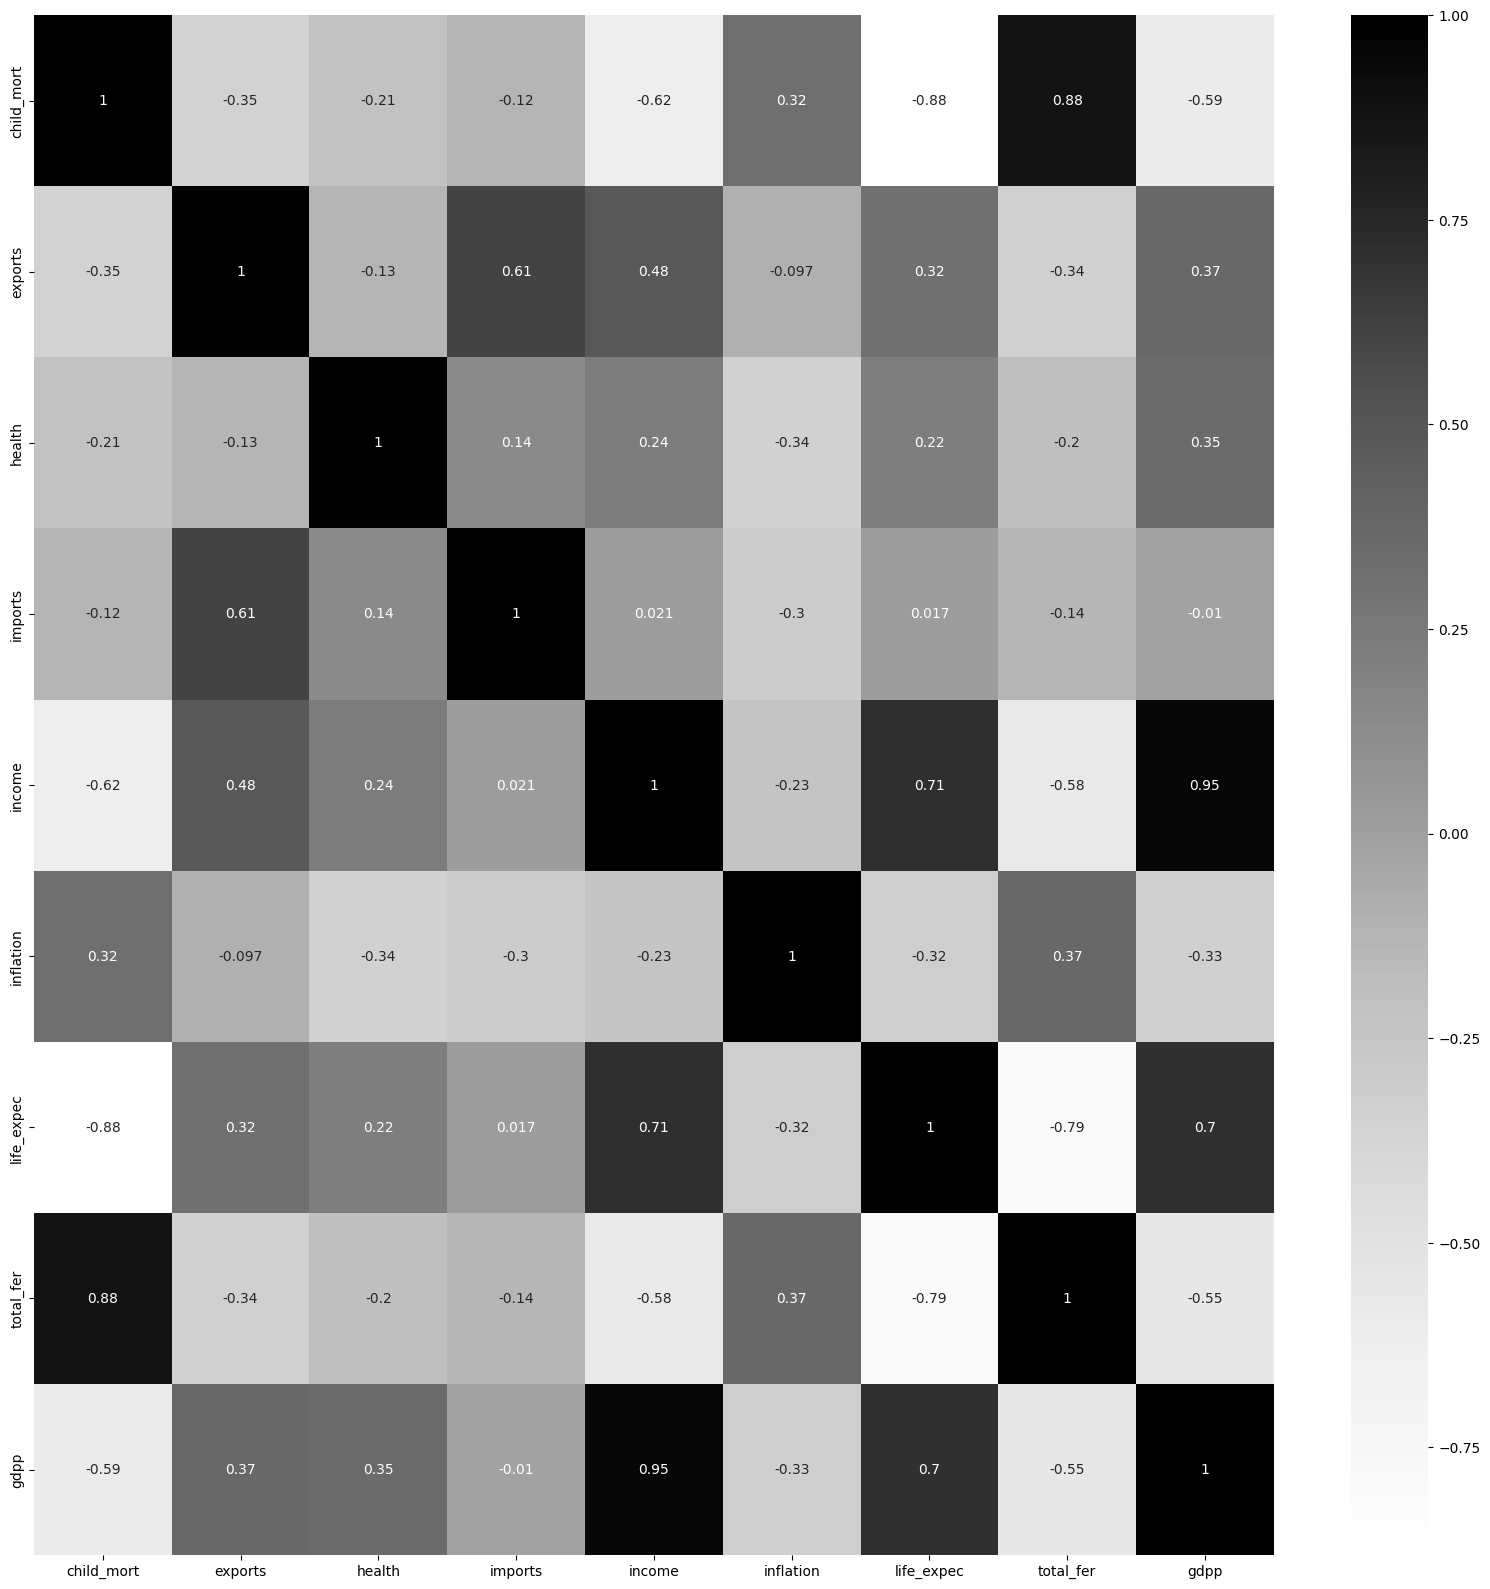

In [165]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numeric_cols].corr(),annot = True,cmap = 'Greys')
plt.show()

In [166]:
features=data.columns[1:]
features

Index(['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

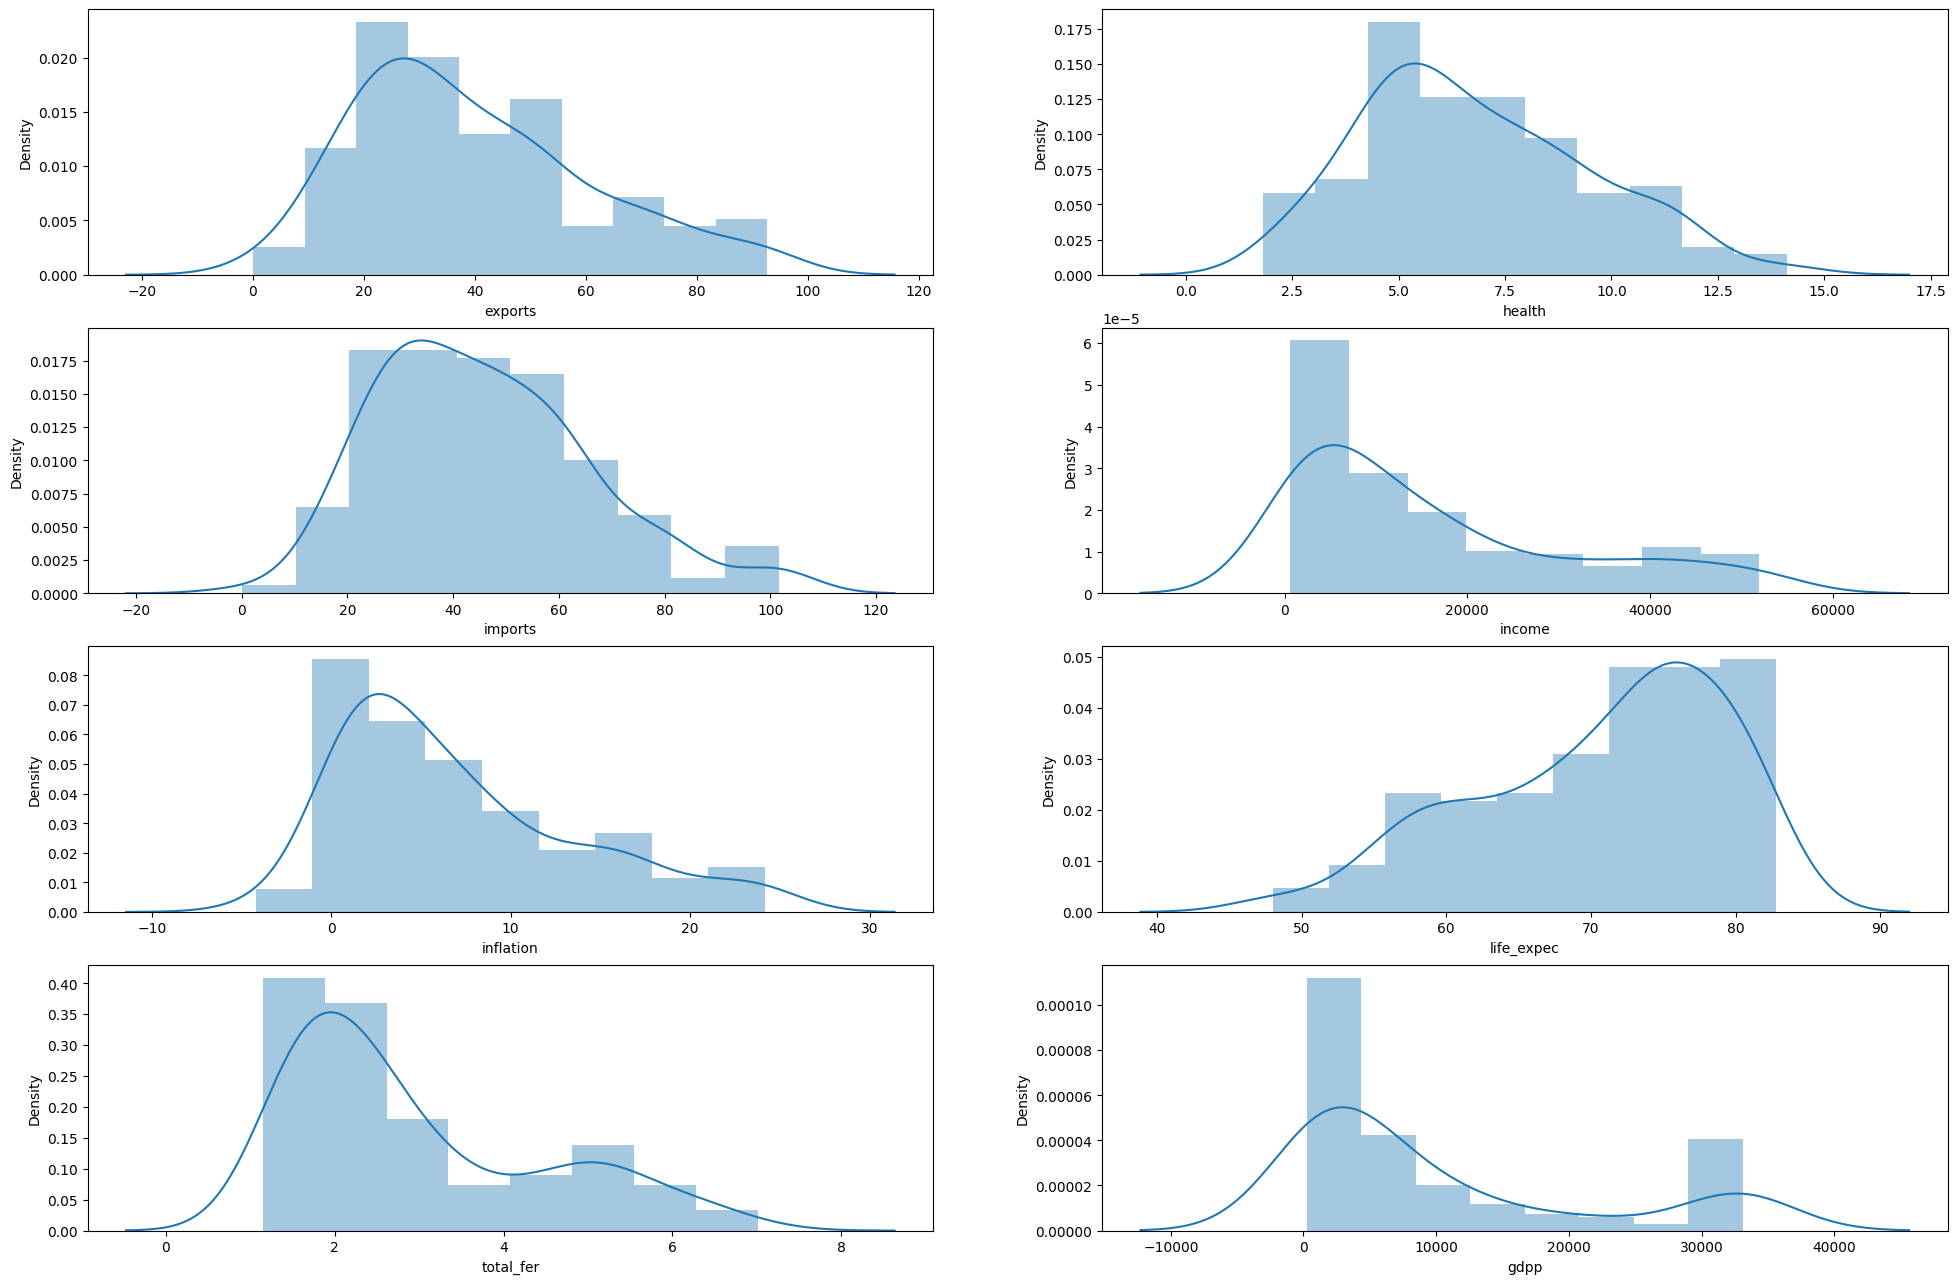

In [167]:
plt.figure(figsize=(24,20))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(data[i[1]])

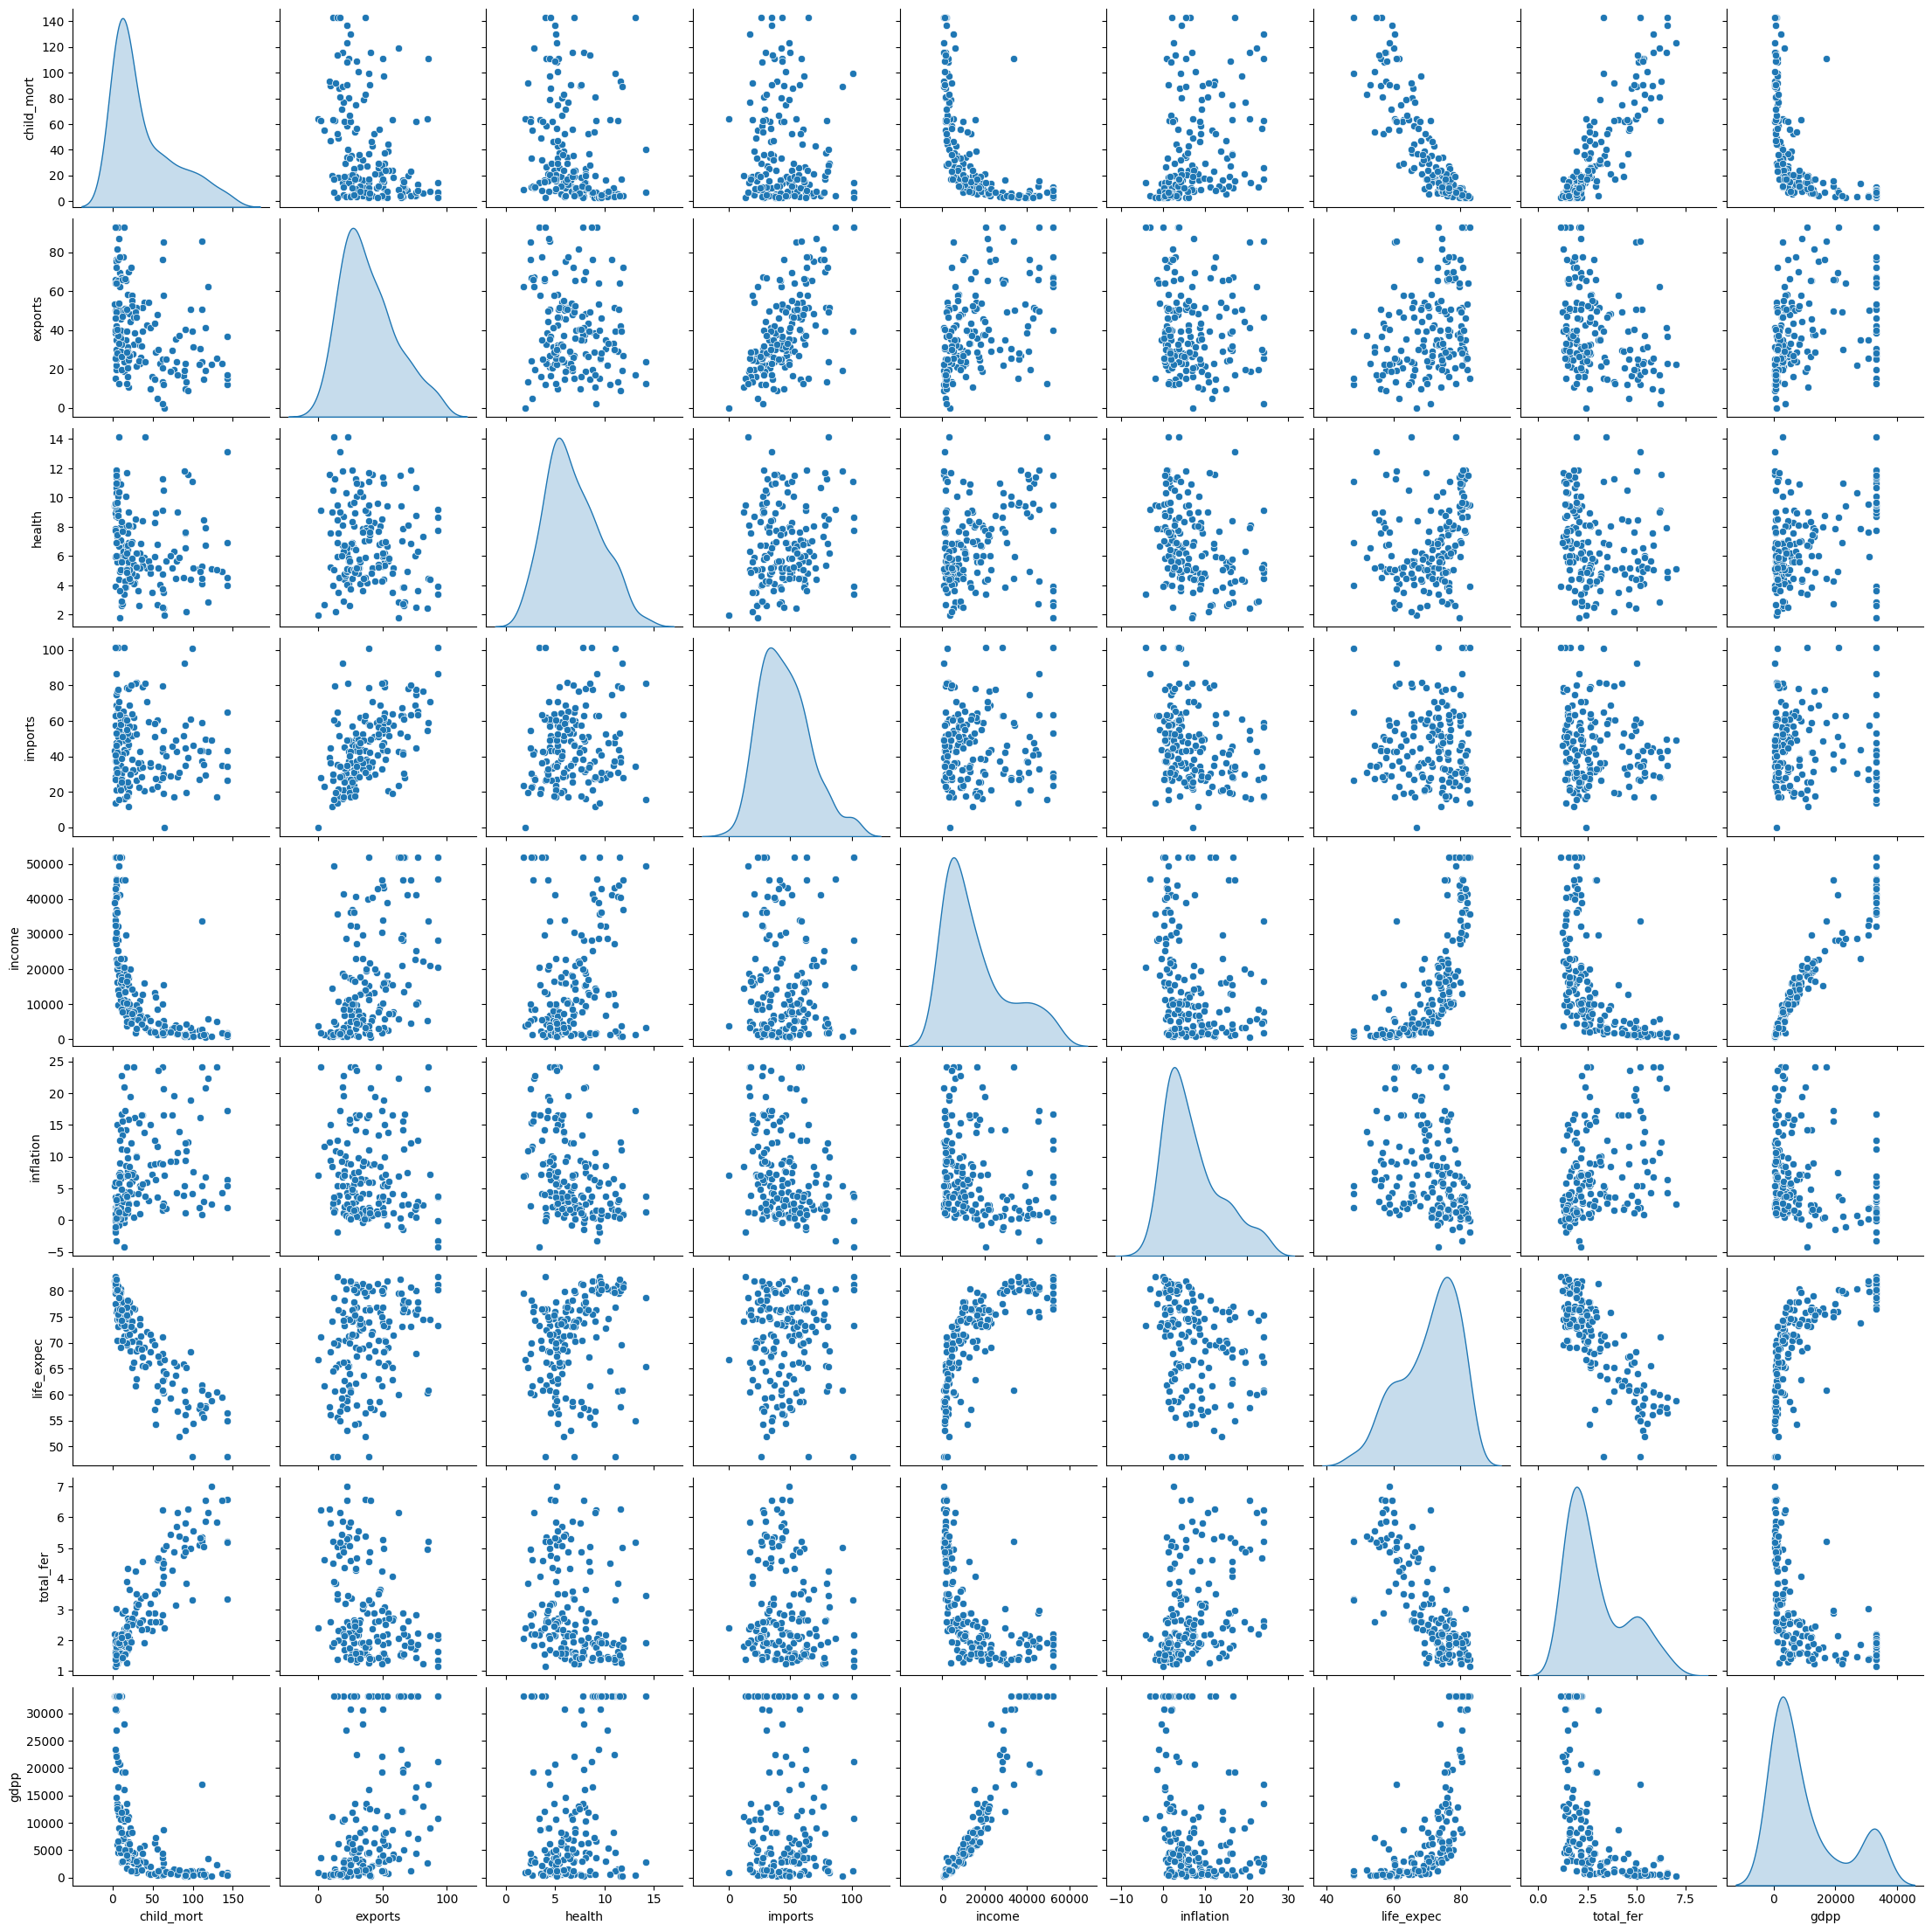

In [168]:
sns.pairplot(data,diag_kind="kde")
plt.show()

# **Feature Engineering**

In [169]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [179]:
categorical_columns

Index([], dtype='object')

In [180]:
numerical_columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# **Data Preparation**

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## **Applying PCA before Clustering**

In [195]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_data = pca_model.fit_transform(scaled_data)

# **Clustering**

## **KMeans**

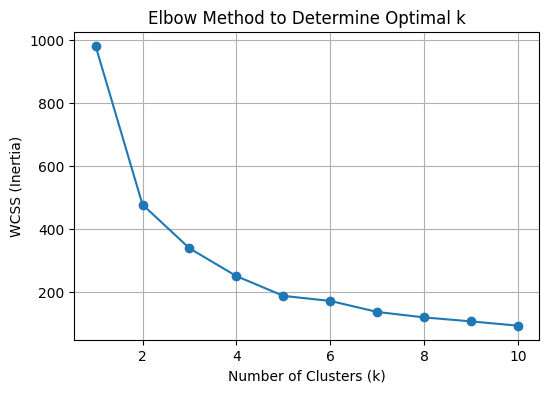

In [198]:
from sklearn.cluster import KMeans

wcss_elbow = []

for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_data)
    wcss_elbow.append(kmeans_model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss_elbow, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [275]:
wcss_elbow = []
print("📉 WCSS (Inertia) Values for Elbow Method:\n")
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia = kmeans.inertia_
    wcss_elbow.append(inertia)
    print(f"🔢 k = {k}, 📦 WCSS (Inertia) = {inertia:.2f}")

📉 WCSS (Inertia) Values for Elbow Method:

🔢 k = 1, 📦 WCSS (Inertia) = 982.14
🔢 k = 2, 📦 WCSS (Inertia) = 477.84
🔢 k = 3, 📦 WCSS (Inertia) = 339.16
🔢 k = 4, 📦 WCSS (Inertia) = 250.92
🔢 k = 5, 📦 WCSS (Inertia) = 188.20
🔢 k = 6, 📦 WCSS (Inertia) = 172.12
🔢 k = 7, 📦 WCSS (Inertia) = 137.15
🔢 k = 8, 📦 WCSS (Inertia) = 119.83
🔢 k = 9, 📦 WCSS (Inertia) = 107.21
🔢 k = 10, 📦 WCSS (Inertia) = 93.51


In [274]:
# 🏁 Using best k which is 2
kmeans_final = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_final.fit_predict(pca_data)

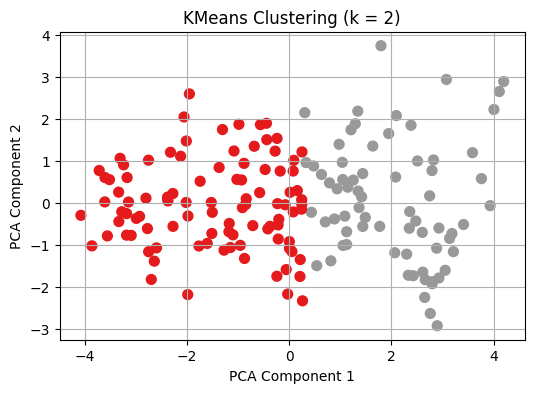

In [265]:
plt.figure(figsize=(6, 4))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='Set1', s=50)
plt.title("KMeans Clustering (k = 2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

### **Silhouette Scores for KMeans**

In [273]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

print("📊 Silhouette Scores for KMeans Clustering:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)
    print(f"🔢 k = {k}, 🧮 Silhouette Score = {score:.4f}")

📊 Silhouette Scores for KMeans Clustering:
🔢 k = 2, 🧮 Silhouette Score = 0.4240
🔢 k = 3, 🧮 Silhouette Score = 0.3576
🔢 k = 4, 🧮 Silhouette Score = 0.3729
🔢 k = 5, 🧮 Silhouette Score = 0.4011
🔢 k = 6, 🧮 Silhouette Score = 0.3390
🔢 k = 7, 🧮 Silhouette Score = 0.3543
🔢 k = 8, 🧮 Silhouette Score = 0.3548
🔢 k = 9, 🧮 Silhouette Score = 0.3407
🔢 k = 10, 🧮 Silhouette Score = 0.3469


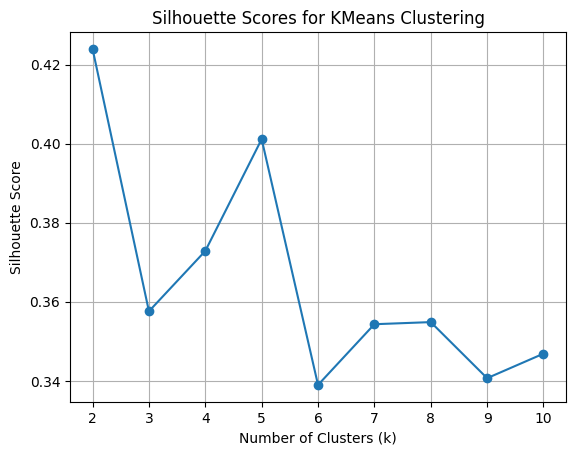

In [230]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [272]:
kmeans_sil_score = silhouette_score(pca_data, kmeans_labels)
print(f"🎯 Final Silhouette Score (KMeans, k = 2): {kmeans_sil_score:.4f}")

🎯 Final Silhouette Score (KMeans, k = 2): 0.4240


## **Dendrogram**

In [212]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(pca_data, method='ward')

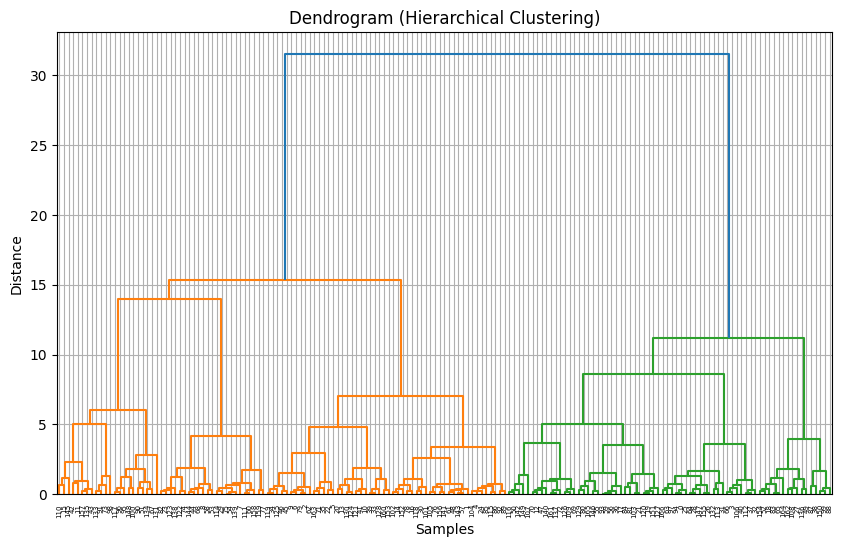

In [249]:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

## **Hierachical Clustering**

In [236]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(pca_data)

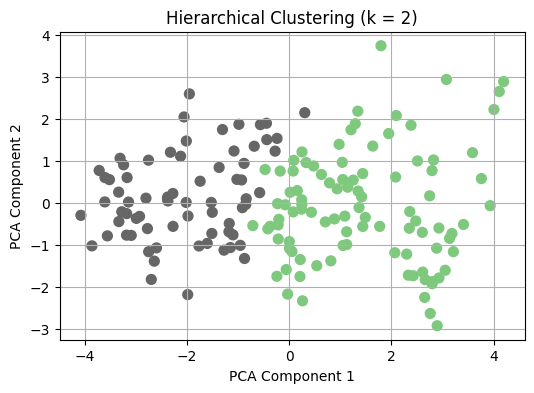

In [239]:
plt.figure(figsize=(6, 4))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='Accent', s=50)
plt.title("Hierarchical Clustering (k = 2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [269]:
hierarchical_sil_score = silhouette_score(pca_data, hierarchical_labels)
print(f"🪜 Silhouette Score (Hierarchical Clustering, k = 2): {hierarchical_sil_score:.4f}")

🪜 Silhouette Score (Hierarchical Clustering, k = 2): 0.4131


DB

## **DBSCAN**

In [251]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(pca_data)

In [266]:
print("🔍 Tuning DBSCAN with different eps values:\n")

for eps in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(pca_data)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        sil = silhouette_score(pca_data, labels)
        print(f"✅ eps = {eps:.1f} | 🔢 Clusters = {n_clusters} | 🧮 Silhouette Score = {sil:.4f}")
    else:
        print(f"⚠️ eps = {eps:.1f} | 🔢 Clusters = {n_clusters} — ❌ Silhouette Score not applicable")

🔍 Tuning DBSCAN with different eps values:

✅ eps = 0.3 | 🔢 Clusters = 4 | 🧮 Silhouette Score = -0.3266
✅ eps = 0.4 | 🔢 Clusters = 10 | 🧮 Silhouette Score = -0.0420
✅ eps = 0.5 | 🔢 Clusters = 3 | 🧮 Silhouette Score = 0.2626
✅ eps = 0.6 | 🔢 Clusters = 3 | 🧮 Silhouette Score = 0.1726
⚠️ eps = 0.7 | 🔢 Clusters = 1 — ❌ Silhouette Score not applicable
⚠️ eps = 0.8 | 🔢 Clusters = 1 — ❌ Silhouette Score not applicable
⚠️ eps = 0.9 | 🔢 Clusters = 1 — ❌ Silhouette Score not applicable
⚠️ eps = 1.0 | 🔢 Clusters = 1 — ❌ Silhouette Score not applicable


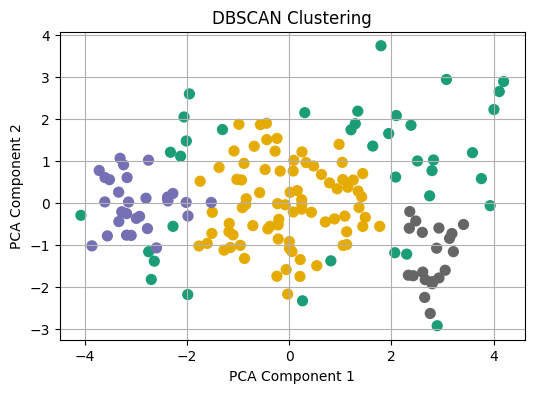

In [259]:
plt.figure(figsize=(6, 4))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='Dark2', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [267]:
# 🔍 Check how many clusters found (excluding noise = -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"📦 DBSCAN found {n_clusters_dbscan} clusters.")

# ✅ Only compute Silhouette Score if valid
if n_clusters_dbscan > 1:
    sil_dbscan = silhouette_score(pca_data, dbscan_labels)
    print(f"📊 Silhouette Score (DBSCAN): {sil_dbscan:.4f}")
else:
    print("⚠️ Silhouette Score not applicable — DBSCAN found only one cluster or just noise.")

📦 DBSCAN found 3 clusters.
📊 Silhouette Score (DBSCAN): 0.2626


## **Clustering Comparison**

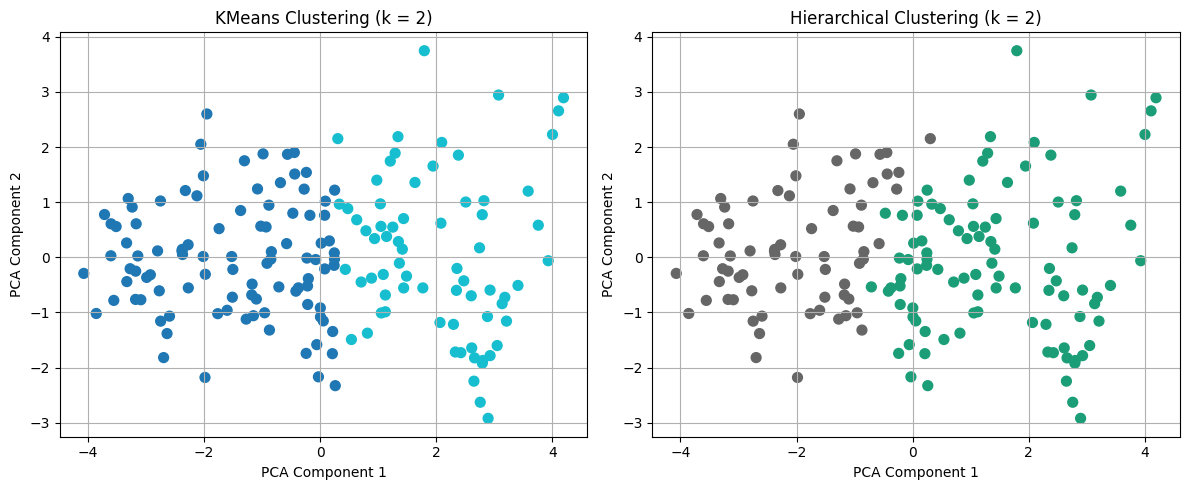

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#KMeans
axes[0].scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='tab10', s=50)
axes[0].set_title("KMeans Clustering (k = 2)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
axes[0].grid(True)

#Hierarchical
axes[1].scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='Dark2', s=50)
axes[1].set_title("Hierarchical Clustering (k = 2)")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [268]:
print(f"📊 Silhouette Score (KMeans): {kmeans_sil_score:.4f}")
print(f"🪜 Silhouette Score (Hierarchical Clustering): {hierarchical_sil_score:.4f}")

📊 Silhouette Score (KMeans): 0.4240
🪜 Silhouette Score (Hierarchical Clustering): 0.4131
